# Modelo de árvore de decisão

Então o primeiro algoritmo escolhido foi a Árvore de Decisão, justamente para verificar como esse algoritmo vai se comportar nesse contexto de atuação. Com isso vai ser usada a classe `DecisionTreeRegressor` do `sklearn`, para usar em conta uma feature de importância que vai ser analisada posteriormente.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

sns.set_theme(style="whitegrid")

In [32]:
train_df = pd.read_parquet('../data/gold/salaries_train.parquet')
test_df = pd.read_parquet('../data/gold/salaries_test.parquet')

y_train = train_df['salary_in_usd']
X_train = train_df.drop('salary_in_usd', axis=1)

y_test = test_df['salary_in_usd']
X_test = test_df.drop('salary_in_usd', axis=1)

X_train = X_train.astype(float)
X_test = X_test.astype(float)

print(f"Dados de Treino prontos: {X_train.shape}")
print(f"Dados de Teste prontos: {X_test.shape}")

Dados de Treino prontos: (27219, 7)
Dados de Teste prontos: (6805, 7)


A primeira etapa é então pegar os dados quen foram definidos anteriormente para a etapa *gold*. Então é o carregamento da base de dados juntamente com a elimição da coluna de `salary_in_usd`, que é justamente a coluna que vai ser usada como resultado para a predição.

E além disso, apenas garantir também a formatação dos dados de *boolean* para *float*, convertendo para 1/0, caso não tenha feito em algum valor ainda.

In [33]:
regressor = DecisionTreeRegressor(random_state=42, max_depth=10)

print("Treinando o modelo...")
regressor.fit(X_train, y_train)
print("Modelo treinado com sucesso!")

Treinando o modelo...
Modelo treinado com sucesso!


Aqui então é o treinamento mesmo do modelo em questão, usando o algoritmo de Árvore de Decisão.

/tmp/ipykernel_18056/3924637051.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_importancia, x='Importancia', y='Feature', palette='viridis')


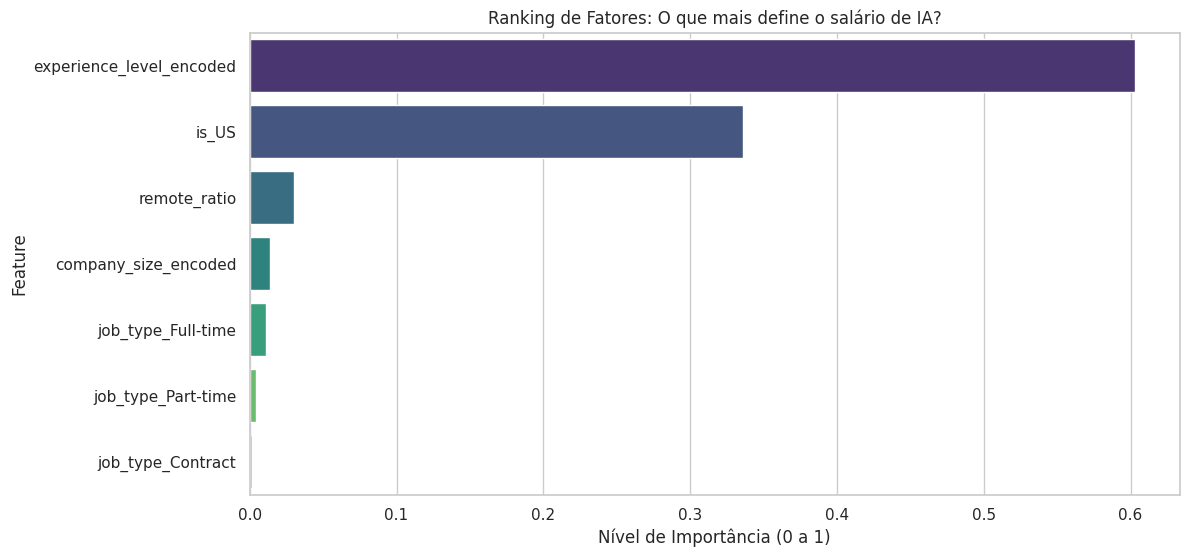

RESPOSTA AO NEGÓCIO: O fator predominante para o salário é 'experience_level_encoded'.


In [34]:
importancias = regressor.feature_importances_
features = X_train.columns

df_importancia = pd.DataFrame({
    'Feature': features,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_importancia, x='Importancia', y='Feature', palette='viridis')
plt.title('Ranking de Fatores: O que mais define o salário de IA?')
plt.xlabel('Nível de Importância (0 a 1)')
plt.show()

fator_top1 = df_importancia.iloc[0]['Feature']
print(f"RESPOSTA AO NEGÓCIO: O fator predominante para o salário é '{fator_top1}'.")

Aqui então, para a análise dos dados, é definido o processo para buscar a "importância" de cada variável de forma externa, assim não só ocorrendo internamente, mas podendo visualizar essas distinções.

Por meio dos gráficos então podemos visualizar os níveis de importância de cada uma das variáveis. É notável que o nível de experiência é um grande fator na decisão dos valores do salário, e com certeza vai ter mais peso no resultado final da análise.

In [35]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("Realizando previsões no conjunto de teste...")
y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Métricas Calculadas -> R2: {r2:.2f}, RMSE: {rmse:.2f}")

artifact_path = '../artifacts/tree_decision'
os.makedirs(artifact_path, exist_ok=True)

joblib.dump(regressor, f'{artifact_path}/model_decision_tree.pkl')

metrics = {
    "R2_Score": r2,
    "RMSE": rmse,
    "MAE": mae,
    "Model_Params": regressor.get_params()
}

with open(f'{artifact_path}/metrics.json', 'w') as f:
    json.dump(metrics, f, indent=4)

importancias = regressor.feature_importances_
df_importancia = pd.DataFrame({'Feature': X_train.columns, 'Importancia': importancias}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(12, 6))
# Linha Nova (Sem aviso)
sns.barplot(data=df_importancia, x='Importancia', y='Feature', hue='Feature', legend=False, palette='viridis')
plt.title('Feature Importance - Decision Tree')
plt.tight_layout()
plt.savefig(f'{artifact_path}/feature_importance.png')
plt.close()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Salário Real')
plt.ylabel('Salário Previsto')
plt.title('Performance Real vs Predito')
plt.tight_layout()
plt.savefig(f'{artifact_path}/real_vs_predito.png')
plt.close()

print(f"Tudo salvo com sucesso em: {artifact_path}")

Realizando previsões no conjunto de teste...
Métricas Calculadas -> R2: 0.15, RMSE: 69366.99


Tudo salvo com sucesso em: ../artifacts/tree_decision


Entã abaixo uma breve análise dos resultados que foram obtidos ao rodar esse primeiro modelo de árvore de decisão.

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import learning_curve

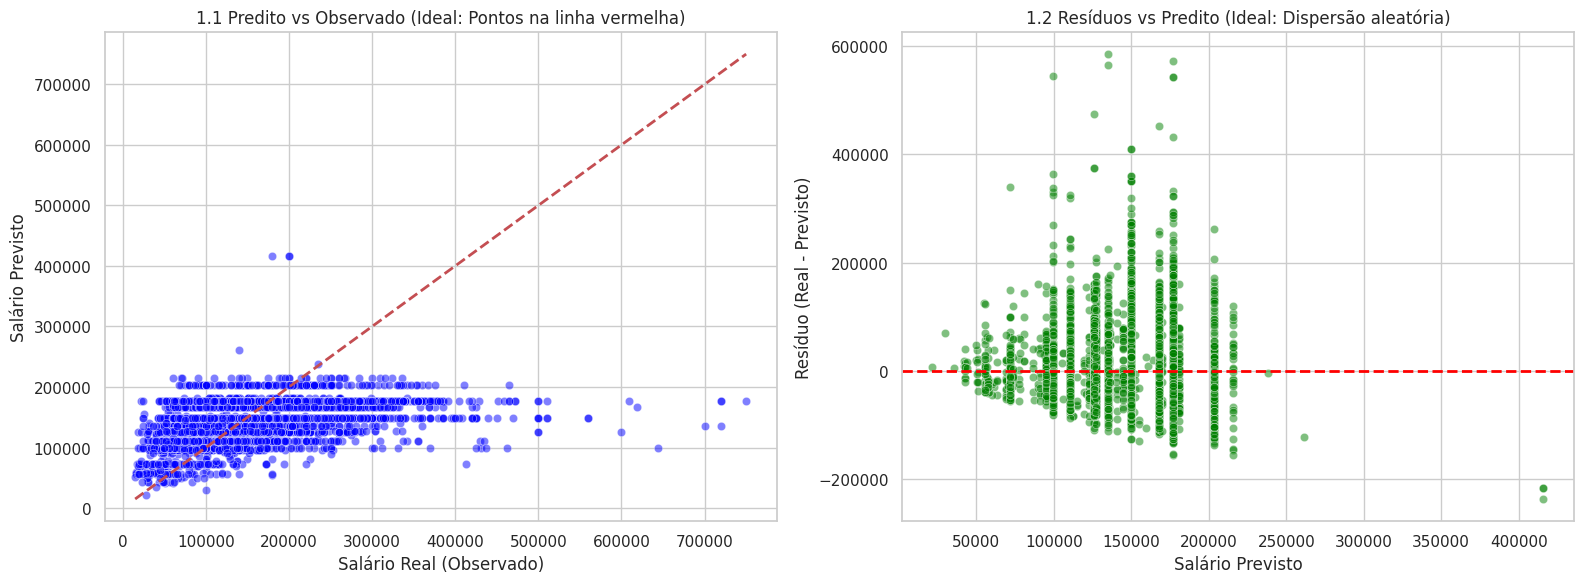

In [37]:
sns.set_theme(style="whitegrid")

residuos = y_test - y_pred

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(x=y_test, y=y_pred, ax=ax[0], alpha=0.5, color='blue')
ax[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax[0].set_title('1.1 Predito vs Observado (Ideal: Pontos na linha vermelha)')
ax[0].set_xlabel('Salário Real (Observado)')
ax[0].set_ylabel('Salário Previsto')

sns.scatterplot(x=y_pred, y=residuos, ax=ax[1], alpha=0.5, color='green')
ax[1].axhline(y=0, color='red', linestyle='--', lw=2)
ax[1].set_title('1.2 Resíduos vs Predito (Ideal: Dispersão aleatória)')
ax[1].set_xlabel('Salário Previsto')
ax[1].set_ylabel('Resíduo (Real - Previsto)')

plt.tight_layout()

plt.savefig('../artifacts/tree_decision/analise_residuos.png')
plt.show()

Um problema encontrado nessa primeira análise foi justamente o valor de R ao quadrado ter sido baixo (apenas de 0,15). Com isso em vista, é claro que o modelo está com dificuldades de de predizer todos os resultados, apresentando-se eficiente em apenas 15% dos cenários. Os outros 85% são definidos então por outros fatores que não estão presentes nessa base de dados (como sorte, negociação individual, bônus da empresa, política interna, etc.).

Isso pode ser visto no gráfico de Predito vs Observado, que o valor deveria estar mais conectado à linha vermelha base. Esse padrão de várias linhas horizontais tá indicando que o modelo simplesmente está chutando vários dos resultados.

Já o gráfico do Resíduos vs Predito tá indicando um cenário de funil, ao qual diz que o modelo tá errando mais, principalmente para cenários altos de salários tá mais complicado esse cenário.

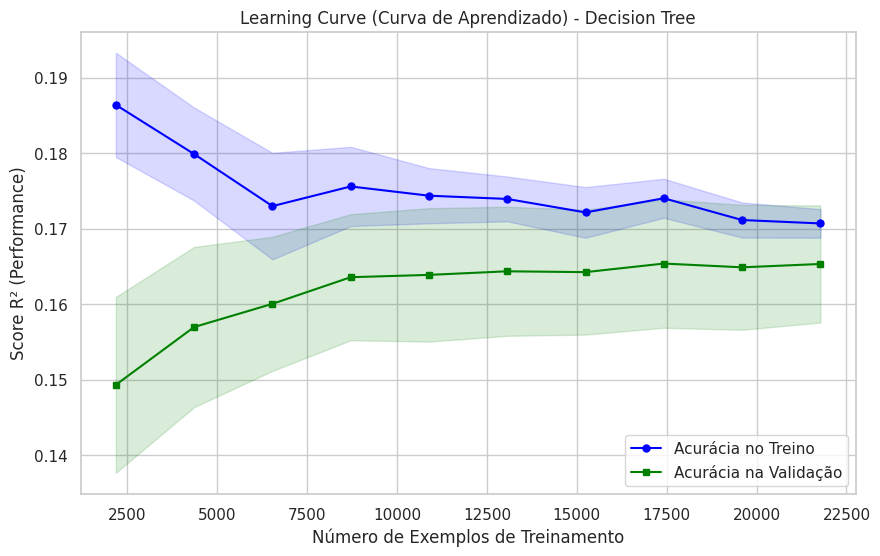

In [38]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=regressor,     
    X=X_train,               
    y=y_train,
    cv=5,                    
    scoring='r2',            
    n_jobs=-1,               
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Acurácia no Treino')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Acurácia na Validação')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('Learning Curve (Curva de Aprendizado) - Decision Tree')
plt.xlabel('Número de Exemplos de Treinamento')
plt.ylabel('Score R² (Performance)')
plt.legend(loc='lower right')
plt.grid(True)

plt.savefig('../artifacts/tree_decision/learning_curve.png')
plt.show()

Nesse caso, das linhas da curva de aprendizado, significa que o modelo está num cenário de *underfitting*, ao qual o modelo em questão está simples demais para captura a complexidade de um problema real, caso esse fosse o cenário. Então isso é um problema também para testar com exatidão qual o salário estimado para aquele contexto passado.